In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow import keras
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers
import keras_tuner
import seaborn as sns

In [2]:
df_ozone=pd.read_csv('ozone_complet_preprocessed.csv')
df_ozone.drop('Unnamed: 0', axis=1, inplace=True)
df_ozone.head()
df_ozone.dropna(inplace=True)
y=df_ozone['maxO3l']
X=df_ozone.drop('maxO3l',axis=1)

In [3]:
X.head()

,maxO3,T6,T9,T12,T15,T18,Ne6,Ne9,Ne12,Ne15,...,Vdir9,Vvit9,Vdir12,Vvit12,Vdir15,Vvit15,Vdir18,Vvit18,Vx,maxO3v
0,47.6,10.1,11.6,13.3,13.6,12.2,8.0,8.0,8.0,8.0,...,290.0,4.0,300.0,4.0,340.0,4.0,20.0,4.0,-3.4641,62.2
1,56.2,9.5,9.4,13.8,17.4,16.3,8.0,8.0,7.0,0.0,...,160.0,2.0,180.0,3.0,110.0,1.0,350.0,2.0,0.0000,47.6
2,61.8,3.6,8.0,16.8,21.5,20.2,4.0,5.0,2.0,2.0,...,20.0,2.0,340.0,1.0,170.0,2.0,170.0,3.0,-0.3420,56.2
3,50.8,9.5,10.5,11.4,12.2,11.4,8.0,7.0,7.0,7.0,...,10.0,4.0,350.0,3.0,350.0,3.0,350.0,4.0,-0.5209,61.8
4,59.8,9.8,10.8,13.8,14.3,13.3,8.0,7.0,8.0,8.0,...,340.0,2.0,280.0,1.0,320.0,3.0,350.0,4.0,-0.9848,50.8


In [4]:
X.drop('maxO3v', axis=1, inplace=True)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

In [6]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_features = scaler.fit_transform(X)
X_train_norm, X_test_norm, y_train_norm, y_test_norm = train_test_split(scaled_features, y, test_size=0.2, random_state=42)


In [7]:
from sklearn.preprocessing import PolynomialFeatures
X.dropna(inplace=True)
X_poly=PolynomialFeatures(3).fit_transform(X)
X_train_poly, X_test_poly, y_train, y_test = train_test_split(X_poly, y, train_size=0.8)
X_poly.shape

(1346, 2300)

In [15]:
model1 = keras.Sequential([
    layers.Dense(100, activation='relu', input_shape=[X_train_norm.shape[1]], name='hidden_layer1'),
    layers.Dropout(0.3),  # Ajout d'une couche Dropout pour réduire le surajustement
    # layers.Dense(32, activation='relu', name='hidden_layer2'),
    # layers.Dropout(0.3),  # Ajout d'une couche Dropout pour réduire le surajustement
    # layers.Dense(32, activation='relu', name='hidden_layer3'),

    # layers.BatchNormalization(),
    
    layers.Dense(1, activation='linear', name='output_layer'),  # Changement de l'activation en 'sigmoid'
])

In [12]:
model = keras.Sequential()
model.add(keras.Dense(256, kernel_initializer='glorot_normal', activation='relu', input_dim=X_train.shape[1]))
model.add(keras.Dense(128, kernel_initializer='glorot_normal', activation='relu'))
model.add(keras.Dense(1))

AttributeError: module 'keras.api._v2.keras' has no attribute 'Dense'

In [16]:
from keras.optimizers import Adam
model1.compile(
    optimizer=Adam(learning_rate=0.01),
    loss='mean_squared_error',
    metrics=['mae'],
)

In [17]:
hist = model1.fit(X_train_norm,
                 y_train_norm,
                 batch_size=32,
                 epochs=50,
                 validation_data=(X_test_norm,y_test_norm))

Epoch 1/50
34/34 [==============================] - 2s 27ms/step - loss: 5698.7412 - mae: 71.3039 - val_loss: 2459.4329 - val_mae: 44.4552
Epoch 2/50
34/34 [==============================] - 0s 9ms/step - loss: 1501.7979 - mae: 31.7040 - val_loss: 874.3046 - val_mae: 23.9483
Epoch 3/50
34/34 [==============================] - 0s 7ms/step - loss: 864.7103 - mae: 23.2477 - val_loss: 544.8901 - val_mae: 17.9622
Epoch 4/50
34/34 [==============================] - 0s 7ms/step - loss: 649.0078 - mae: 20.0329 - val_loss: 433.8053 - val_mae: 15.7852
Epoch 5/50
34/34 [==============================] - 0s 7ms/step - loss: 547.3658 - mae: 18.4282 - val_loss: 362.2607 - val_mae: 14.4997
Epoch 6/50
34/34 [==============================] - 0s 7ms/step - loss: 460.9949 - mae: 17.0027 - val_loss: 321.3365 - val_mae: 13.6677
Epoch 7/50
34/34 [==============================] - 0s 7ms/step - loss: 411.9301 - mae: 15.9790 - val_loss: 310.8485 - val_mae: 13.3926
Epoch 8/50
34/34 [==========================

In [19]:
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score

predictions=model1.predict(X_test_norm)
# Calcul du RMSE (Root Mean Squared Error)
rmse = mean_squared_error(y_test_norm, predictions, squared=False)
print(f"RMSE: {rmse}")

# Calcul du MAE (Mean Absolute Error)
mae = mean_absolute_error(y_test_norm, predictions)
print(f"MAE: {mae}")

# Coefficient de détermination (R²)
r2 = r2_score(y_test_norm, predictions)
print(f"R² Score: {r2}")

9/9 [==============================] - 0s 3ms/step
RMSE: 16.04456893166392
MAE: 11.859648064507377
R² Score: 0.5052907960005036


Minimum validation loss: 231.8200225830078


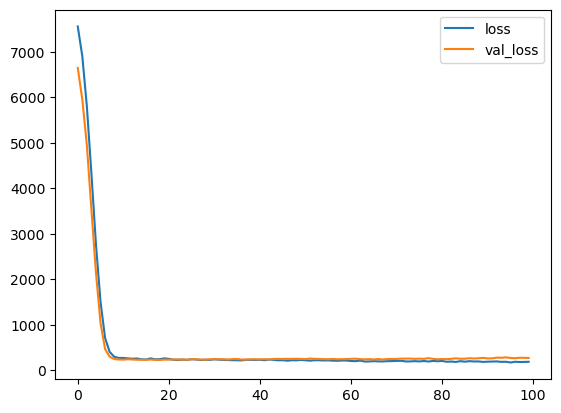

In [ ]:
history_df = pd.DataFrame(hist.history)
history_df.loc[:, ['loss', 'val_loss']].plot();
print("Minimum validation loss: {}".format(history_df['val_loss'].min()))